# Import Library

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define facies colors, label

In [0]:
feature_names = ['GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS']
facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS', 'WS', 'D', 'PS', 'BS']
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

# Define confusion matrix

In [0]:
def plot_confusion_matrix(conf, cmap=plt.cm.Blues):
    cm = conf
    classes = facies_labels
    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='confusion matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Accuracy adjacent

In [0]:
adjacent_facies = np.array([[1], [0,2], [1], [4], [3,5], [4,6,7], [5,7], [5,6,8], [6,7]])

def accuracy_adjacent(conf, adjacent_facies):
    nb_classes = conf.shape[0]
    total_correct = 0.
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
        for j in adjacent_facies[i]:
            if j< nb_classes: ##
                total_correct += conf[i][j] 
    return total_correct / sum(sum(conf))

# Import Drive

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [32]:
cd /content/gdrive/My\ Drive/UAE2019/Facies/

/content/gdrive/My Drive/UAE2019/Facies


In [33]:
ls

ex1_Facies.ipynb                train_data.csv
ex2_Facies_xgboost.ipynb        training_data.csv
ex3_Facies_augumentation.ipynb  valid_ex1_Facies.ipynb
old/                            valid_ex2_Facies_xgboost.ipynb
test_data.csv                   valid_ex3_Facies_augumentation.ipynb


# Train data

In [0]:
#Load Data
data = pd.read_csv('train_data.csv')

X = data[feature_names].values 
y = data['Facies'].values 

# Test data

In [0]:
test = pd.read_csv('test_data.csv')

X_t = test[feature_names].values 
y_t = test['Facies'].values 

Optimized facies classification accuracy = 0.49
Optimized adjacent facies classification accuracy = 0.97
[[10 77  2  0  0  0  0  0]
 [ 8 71 10  0  0  0  0  0]
 [ 0 57 60  0  0  0  0  0]
 [ 0  0  0  2  0  4  0  1]
 [ 0  0  0 13  1  4  0  1]
 [ 0  0  1  5 12 44  0  9]
 [ 0  0  0  0  0  2 12  3]
 [ 0  0  0  0  0 18  3 19]]


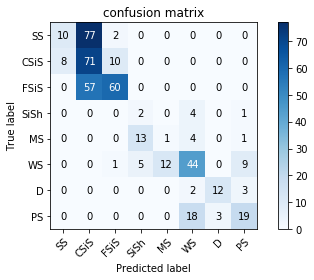

In [36]:
import xgboost as xgb
from xgboost.sklearn import  XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

model = Pipeline([
        ("scaler", StandardScaler()),   
        ("xgboost_clf", XGBClassifier(learning_rate=0.12, max_depth=3, min_child_weight=10, n_estimators=150, seed=10, colsample_bytree=0.9))
    ])

model.fit(X, y)

y_pred =model.predict(X_t)

conf = confusion_matrix(y_t, y_pred)

d=f1_score(y_t, y_pred, average='micro')
print('Optimized facies classification accuracy = %.2f' % d)
print('Optimized adjacent facies classification accuracy = %.2f' % accuracy_adjacent(conf, adjacent_facies))

plot_confusion_matrix(conf)